# Deep Learning Blitz

In [98]:
import torch
import torchvision
import torchvision.transforms as transforms

import numpy as np
import matplotlib.pyplot as plt

## Tensors

In [13]:
# Constructing a 5 x 3 matrix of zeros

x = torch.empty(5, 3)
x

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])

In [16]:
# Constructing a 5 x 3 matrix with random values

x = torch.rand(5, 3)
x

tensor([[0.2327, 0.4142, 0.5414],
        [0.7240, 0.2366, 0.9097],
        [0.0234, 0.5596, 0.0239],
        [0.4584, 0.9063, 0.7659],
        [0.7907, 0.8400, 0.4473]])

In [17]:
# Constructing a 5 x 3 matrix filled with zeros of dtype long

x = torch.zeros(5, 3, dtype=torch.long)
x

tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]])

In [18]:
# Constructing a tensor directly from data

x = torch.tensor([3.14, 6.18])
x

tensor([3.1400, 6.1800])

In [20]:
# Create a new tensore based on another

x = x.new_ones(5, 3, dtype=torch.double)
print(x)

x = torch.randn_like(x, dtype=torch.float)
print(x)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)
tensor([[ 0.0146, -0.5414,  0.2056],
        [-0.2903,  0.7867, -1.3890],
        [-0.4571,  0.4369, -0.2362],
        [-1.0425, -2.3861, -0.8568],
        [-0.3110, -1.4198,  1.1166]])


In [21]:
# Get the shape of a tensor

x.size()

torch.Size([5, 3])

## Tensor Operations

In [24]:
x = torch.rand(3, 3)
y = torch.rand(3, 3)

z = x + y
z_2 = torch.add(x, y)

print(x)
print(y)
print(z)
print(z_2)

tensor([[0.7092, 0.4650, 0.2682],
        [0.4332, 0.1213, 0.6822],
        [0.7261, 0.1203, 0.2334]])
tensor([[0.3057, 0.7194, 0.7626],
        [0.5535, 0.2738, 0.9569],
        [0.6140, 0.1797, 0.3105]])
tensor([[1.0149, 1.1844, 1.0309],
        [0.9868, 0.3951, 1.6391],
        [1.3401, 0.3000, 0.5439]])
tensor([[1.0149, 1.1844, 1.0309],
        [0.9868, 0.3951, 1.6391],
        [1.3401, 0.3000, 0.5439]])


In [26]:
# In-place addition. Any operation that does in-place operations has '_' post fixed.

y.add_(x)
y

tensor([[1.7241, 1.6494, 1.2991],
        [1.4200, 0.5164, 2.3213],
        [2.0662, 0.4203, 0.7773]])

In [29]:
x = torch.randn(3, 3)
x

tensor([[ 0.7593, -0.5042, -1.1148],
        [-0.7923, -1.0351,  0.6849],
        [ 0.0739,  0.7183,  0.1048]])

In [32]:
# Access rows

r1 = x[0]
r2 = x[1]
r3 = x[2]

r1, r2, r3

(tensor([ 0.7593, -0.5042, -1.1148]),
 tensor([-0.7923, -1.0351,  0.6849]),
 tensor([0.0739, 0.7183, 0.1048]))

In [35]:
# Access columns

c1 = x[:, 0]
c2 = x[:, 1]
c3 = x[:, 2]

c1, c2, c3

(tensor([ 0.7593, -0.7923,  0.0739]),
 tensor([-0.5042, -1.0351,  0.7183]),
 tensor([-1.1148,  0.6849,  0.1048]))

In [41]:
# Resizing tensors

x = torch.randn(4, 4)
y = x.view(16)
z = x.view(-1, 8)  # size -1 is inferred from other dimensions

x.size(), y.size(), z.size()

(torch.Size([4, 4]), torch.Size([16]), torch.Size([2, 8]))

## Torch Tensor to Numpy and Back

In [42]:
x = torch.ones(5)
x

tensor([1., 1., 1., 1., 1.])

In [44]:
y = x.numpy()
y

array([1., 1., 1., 1., 1.], dtype=float32)

In [46]:
z = torch.from_numpy(y)
z

tensor([1., 1., 1., 1., 1.])

## CUDA Tensors

In [47]:
torch.cuda.is_available()

False

In [49]:
if torch.cuda.is_available():
    device = torch.device('cuda')
    x = torch.randn(3, 3, device=device)  # Initialize tensore on GPU
    y = torch.randn(4, 4)                 # Send densore to GPU
    y = y.to(device)
    print(x)
    print(y)

## Autograd: Automatic Differentiation

In [51]:
x = torch.ones(2, 2, requires_grad=True)
x

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)

In [53]:
y = x + 2
y

tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)

In [54]:
y.grad_fn

In [55]:
z = y * y * 3
out = z.mean()

z, out

(tensor([[27., 27.],
         [27., 27.]], grad_fn=<MulBackward0>),
 tensor(27., grad_fn=<MeanBackward0>))

In [56]:
# Backprop

out.backward()

# print gradients d(out) / dx
x.grad

tensor([[4.5000, 4.5000],
        [4.5000, 4.5000]])

## Neural Networks

- Define the neural network that has some learnable parameters (or weights)
- Iterate over a dataset of inputs
- Process input through the network
- Compute the loss (how far is the output from being correct)
- Propagate gradients back into the network’s parameters
- Update the weights of the network, typically using a simple update rule: weight = weight - learning_rate * gradient

In [90]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [68]:
class Net(nn.Module):
    
    def __init__(self):
        super(Net, self).__init__()
        
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=3)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=3)
        
        self.fc1 = nn.Linear(in_features=16 * 6 * 6, out_features=120)
        self.fc2 = nn.Linear(in_features=120, out_features=84)
        self.fc3 = nn.Linear(in_features=84, out_features=10)
        
    def forward(self, x):
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        
        return x
    
    def num_flat_features(self, x):
        size = x.size()[1:]  # get all dimensions excluding the bactch dimension
        num_features = 1
        for s in size:
            num_features *= s
            
        return num_features
        
        
net = Net()
print(net)

params = list(net.parameters())
print(len(params))
print(params[0].size())

Net(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=576, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)
10
torch.Size([6, 1, 3, 3])


In [87]:
# Feed a random 32 X 32 input

sample = torch.randn(1, 1, 32, 32)  # nSamples x nChannels x Height x Width

In [88]:
# Loss function

output = net(sample)
target = torch.randn(10).view(1, -1)
loss_func = nn.MSELoss()

loss = loss_func(output, target)

print(output.shape)
print(target.shape)
print(loss)

torch.Size([1, 10])
torch.Size([1, 10])
tensor(0.8038, grad_fn=<MseLossBackward>)


In [86]:
print(loss.grad_fn)
print(loss.grad_fn.next_functions[0][0])
print(loss.grad_fn.next_functions[0][0].next_functions[0][0])

In [89]:
# Backprop error

net.zero_grad()

print('conv1.bias.grad before backprop')
print(net.conv1.bias.grad)

loss.backward()

print('conv1.bias.grad after backprop')
print(net.conv1.bias.grad)

conv1.bias.grad before backprop
tensor([0., 0., 0., 0., 0., 0.])
conv1.bias.grad after backprop
tensor([-0.0017,  0.0056, -0.0168, -0.0014, -0.0092,  0.0071])


In [91]:
# updating the weights

optimizer = optim.SGD(params=net.parameters(), lr=0.01)

# in training loop
optimizer.zero_grad()
output = net(sample)
loss = loss_func(output, target)
loss.backward()
optimizer.step()

## Training a Classifier
Train a classifer for CIFAR10

- Load and normalizing the CIFAR10 training and test datasets using torchvision
- Define a Convolutional Neural Network
- Define a loss function
- Train the network on the training data
- Test the network on the test data

In [104]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


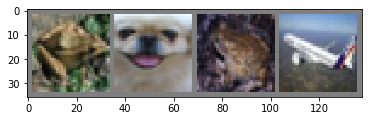

 frog   dog  frog plane


In [105]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [110]:
class Net(nn.Module):
    
    def __init__(self):
        super(Net, self).__init__()
        
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        
        return x
        
net = Net()
net

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [125]:
loss_func = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [126]:
for epoch in range(2):
    
    running_loss = 0.0
    for i, data, in enumerate(trainloader):
        # Get mini-batch samples
        inputs, labels = data
        
        # Zero out gradients
        optimizer.zero_grad()
        
        # forward + backward + optimize
        outputs = net(inputs)
        loss = loss_func(outputs, labels)
        loss.backward()
        optimizer.step()
        
        # Print training stats
        running_loss += loss.item()
        if i % 2000 == 1999:
            print(f'[{epoch + 1}, {i + 1}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0
            
print('Training finished')

[1, 2000] loss: 2.262
[1, 4000] loss: 1.948
[1, 6000] loss: 1.728
[1, 8000] loss: 1.610
[1, 10000] loss: 1.528
[1, 12000] loss: 1.471
[2, 2000] loss: 1.398
[2, 4000] loss: 1.370
[2, 6000] loss: 1.362
[2, 8000] loss: 1.331
[2, 10000] loss: 1.312
[2, 12000] loss: 1.268
Training finished


In [127]:
torch.save(net.state_dict(), './models/cifar10_net.pth')

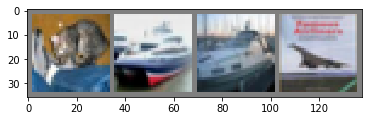

Ground Truth:    cat  ship  ship plane


In [129]:
dataiter = iter(testloader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))
print('Ground Truth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [130]:
net = Net()
net.load_state_dict(torch.load('./models/cifar10_net.pth'))

<All keys matched successfully>

In [133]:
outputs = net(images)

_, predicted = torch.max(outputs, 1)
print('Ground Truth: ', ' '.join('%5s' % classes[predicted[j]] for j in range(4)))

Ground Truth:    cat  ship  ship  ship


In [135]:
correct = 0
total = 0

with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct / total))

Accuracy of the network on the 10000 test images: 55 %


In [136]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 42 %
Accuracy of   car : 63 %
Accuracy of  bird : 48 %
Accuracy of   cat : 49 %
Accuracy of  deer : 57 %
Accuracy of   dog : 26 %
Accuracy of  frog : 60 %
Accuracy of horse : 57 %
Accuracy of  ship : 78 %
Accuracy of truck : 68 %
